# **EDA on Survey Data Demographics**

**Firstly, we need to install Java and Spark**

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

**After installing Spark, import it to the workspace.**

In [ ]:
import findspark
findspark.init()

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

**Importing the CSV dataset using spark.read**

In [ ]:
df = spark.read.csv('/content/survey data demographics.csv', inferSchema=True, header=True)

**Using show() function to see how the dataset looks like after being imported here**

In [ ]:
df.show()

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+--------------------+--------------------+----------+----------------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+-

**Using the describe() function to show the count, mean, stddev, min and max for every column to get the initial insights of the dataset**

In [ ]:
df.describe().show()

+-------+------------------+--------------------+--------+--------------------+--------------------+------------------+--------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+------------+-----------------+--------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+----------+--------+-----+----------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+--------

**Get the total count of the dataframe using count() function**

In [ ]:
df.count()

11398

**Checking the total number of null values in every column**

In [ ]:
for col in df.columns:
  print(col, '\t' 'with null values: ', df.filter(df[col].isNull()).count())

**What are the data types for all the columns? Most of the columns data type are strings but few other columns are of integer and double**

In [ ]:
df.dtypes

**What is the distribution of age for all respondents?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


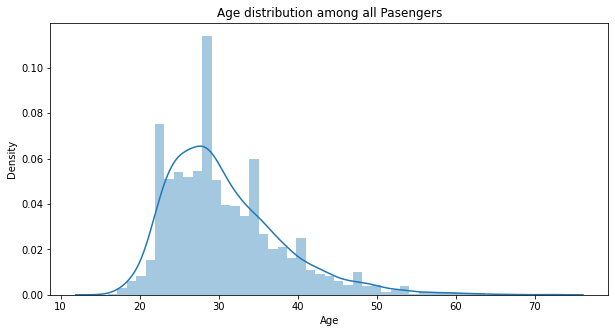

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pandas_df = df.toPandas()

plt.figure(figsize=(10,5))
plt.title('Age distribution among all Pasengers')
sns.distplot(pandas_df['Age']);

**What is the relation between age and their desire to be a manager?**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=pandas_df['MgrWant'], y=pandas_df['Age'], mode='markers')])
fig.update_layout(title='Age vs MgrWant', xaxis_title='MgrWant', yaxis_title='Age')
fig.show()

**How can we see the correlation between age with years of code, age 1st code and years code pro individually?**

In [ ]:
# Make 3 histograms: 'YearsCode', 'Age1stCode', 'YearsCodePro'
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

pandas_df = df.toPandas()

fig = make_subplots(rows=2, cols=2, subplot_titles=['Years of Code', 'Age 1st Code', 'Years Code Pro'])

YearsCode = go.Histogram(x=pandas_df['YearsCode'], nbinsx=20, name='Total YearsCode')
Age1stCode = go.Histogram(x=pandas_df['Age1stCode'], nbinsx=20, name='Age1stCode')
YearsCodePro = go.Histogram(x=pandas_df['YearsCodePro'], nbinsx=20, name='YearsCodePro')


fig.add_traces(YearsCode, 1, 1)
fig.add_traces(Age1stCode, 1, 2)
fig.add_traces(YearsCodePro, 2, 1)


fig.update_layout(showlegend=False)
fig.show()

In [ ]:
pandas_df = df.toPandas()

fig = make_subplots(rows=2, cols=2, subplot_titles=['Work Location', 'Open Sourcer', 'Years Code Pro'])



YearsCode = go.Box(x=pandas_df['WorkLoc'],  name='Work Location')
Age1stCode = go.Box(x=pandas_df['OpenSourcer'],  name='Open Sourcer')
YearsCodePro = go.Box(x=pandas_df['YearsCodePro'], name='YearsCodePro')


fig.add_traces(YearsCode, 1, 1)
fig.add_traces(Age1stCode, 1, 2)
fig.add_traces(YearsCodePro, 2, 1)


fig.update_layout(showlegend=False)
fig.show()

**The respondents are mostly still a student or not?**

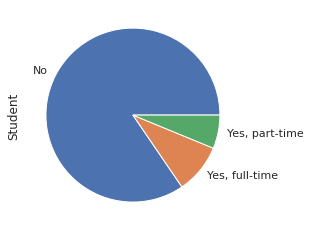

In [ ]:
pandas_df = df.toPandas()
pandas_df.Student.value_counts(normalize=True).plot.pie()
plt.show()

**How many of the total respondents think that the survey was esay?**

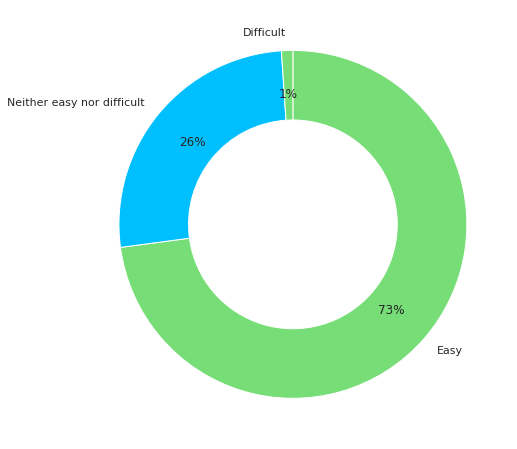

In [ ]:
pandas_df = df.toPandas()
plt.figure(figsize=[8,8])
src=pandas_df.SurveyEase.value_counts()
plt.pie(src,labels=src.index,startangle=90,counterclock=False,colors=['#77DD77','#00BFFF'],wedgeprops={'width':0.4},autopct='%1.0f%%', pctdistance=0.75);

**What is the fractions of Work Location?**

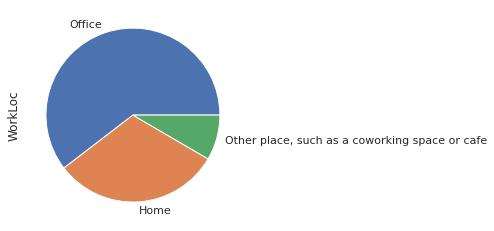

In [ ]:
pandas_df = df.toPandas()
pandas_df.WorkLoc.value_counts(normalize=True).plot.pie()
plt.show()

**What is the number of users for each social media?**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 24494 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 20449 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 28010 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 21338 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 20248 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 37239 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

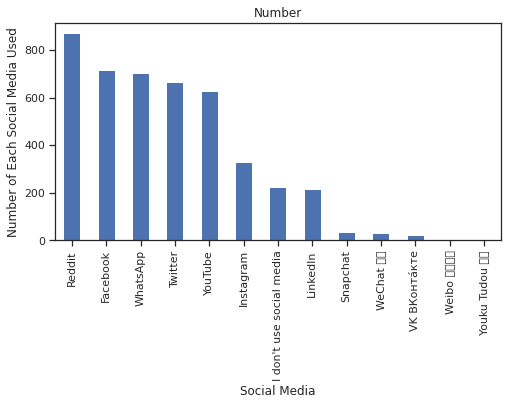

In [ ]:
pandas_df.SocialMedia.value_counts().nlargest(30).plot(kind='bar', figsize=(8,4))
plt.title('Number')
plt.ylabel('Number of Each Social Media Used')
plt.xlabel('Social Media');